# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: Correlation
### VIDEO: Simulate data with specified correlation
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

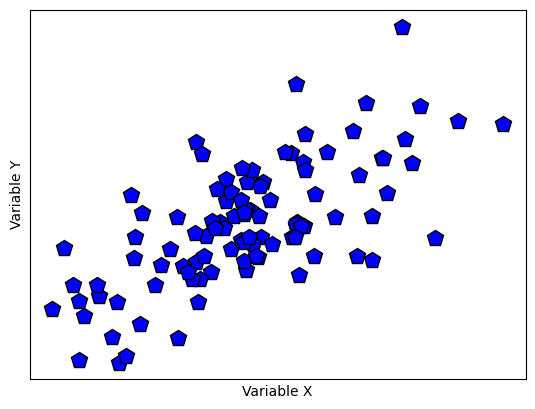

In [2]:
## Simulating data with a specific correlation coefficient:

# data simulation parameters
N = 100  # number of samples
r = .6   # desired target correlation coefficient we want to set the data to have

# start with random numbers - at this point the correlation would be expected to be zero with some sampling variability - just two random unrelated sets
x = np.random.randn(N)
y = np.random.randn(N)

# impose the correlation on y, we change the vals of y according to x and the desired correlation coefficient
y = x*r + y*np.sqrt(1-r**2) # x is scaled up by the correlation we want, y is scaled down by 1 - the correlation coefficient (we square to make it always positive for the substraction)

# plot the data now that it is set up to be correlated at .6
plt.plot(x,y,'kp',markerfacecolor='b',markersize=12)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
## compute the empirical correlation to prove that our simulated data was generated with the set correlation
# using numpys builtin fn:
empR = np.corrcoef(x,y)

print('Desired (theoretical) r=%g, empirical r (from random samples)=%g'%(r,empR[0,1]))
# NOTE: The result may not match our target r. The reason is the r we set is a theoretial correlation coefficient, but we are actually sub-sampling from random numbers.
# So at the limit, if you had an inifinite amount of data and then applied the formula y = x*r + y*np.sqrt(1-r**2), you would see the correlations match. 
# See below where we test out larger sample sizes

Desired (theoretical) r=0.6, empirical r (from random samples)=0.686588


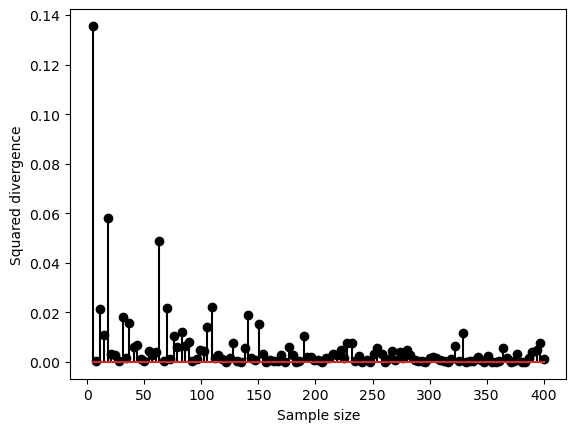

In [7]:
## Test the errors (the difference of the target and actual correlations) as a function of N (sample size as it increases)
## We want to plot and see if the error gets smaller as we increase the sample size


# range of sample sizes
Ns = np.round( np.linspace(5,400,123) ).astype(int) # specify sample sizes go from 5 to 400

# theoretical correlation coefficient (fixed)
r = .6

# initialize for use in the loop
corrs = np.zeros(len(Ns))

# run the experiment! run experiment for the different samples sizes generated above
for ni in range(len(Ns)):
    x = np.random.randn(Ns[ni])
    y = x*r + np.random.randn(Ns[ni])*np.sqrt(1-r**2)
    # get the error (the diff between the theoretical and actual correlation from the sample)
    corrs[ni] = (r-np.corrcoef(x,y)[0,1])**2 # subtract the actual correlation from the theoretical r we set. we square because errors are commonly squared in statistics and it makes the result positive

    

plt.stem(Ns,corrs,'ko-')
plt.xlabel('Sample size')
plt.ylabel('Squared divergence')
plt.show()

# this will show that as you increase sample size, the divergence or error will decrease and the actual r gets closer to the theoretical r (though there are still discrepencies)